In [1]:
!python --version

Python 3.13.7


In [2]:
import json

with open('week3.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)

list(data.keys())

['Nvidia', 'AMD', 'Intel']

In [3]:
import networkx as nx

G = nx.MultiDiGraph()

for chipmaker in data:
    for d in data[chipmaker]:
        date = d['date']
        for triplet in d['triplets']:
            subject = triplet['subject']
            relation = triplet['relation']
            object_ = triplet['object']

            verb = relation.get("verb")
            detail = relation.get("detail")

            G.add_edge(
                subject,
                object_,
                key=verb,
                verb=verb,
                detail=detail,
                date=date,
                chipmaker=chipmaker
            )

In [4]:
from google import genai
from dotenv import load_dotenv
import os

load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY", "")
client = genai.Client(api_key=GEMINI_API_KEY)

In [5]:
summary7day_prompt = """
You are an analyst specializing in the semiconductor industry. 

TASK:
Summarize risks and opportunities for **{chipmaker}** over the last 7 days based on extracted knowledge triplets.

INPUT FORMAT:
Each triplet has:
- subject
- relation (verb + optional detail)
- object

Triplets (past 7 days):
{triplets}

INSTRUCTIONS:
1. Carefully analyze the triplets to identify signals of **risks** (e.g., export restrictions, regulatory scrutiny, market struggles, competition, delays).
2. Identify **opportunities** (e.g., new product launches, strong demand, partnerships, positive analyst ratings, technological advances).
3. For each risk or opportunity, **cite the supporting triplet** in this format:
   subject -(verb[/detail])-> object
   Example: China -(scrutinizes)-> Nvidia
4. Organize into two sections:
   - **Risks for {chipmaker}**
   - **Opportunities for {chipmaker}**
5. At the end, write a **short summary outlook** combining both risks and opportunities.

OUTPUT FORMAT:
Risks for {chipmaker}:
- [triplet] → explanation
- ...

Opportunities for {chipmaker}:
- [triplet] → explanation
- ...

Outlook:
<short paragraph>
"""

In [11]:
chipmaker = "Nvidia"
triplets = [t for d in data[chipmaker] for t in d['triplets']]

response = client.models.generate_content(
    model="gemini-2.5-flash", 
    contents=summary7day_prompt.format(
        chipmaker=chipmaker, 
        triplets=triplets
    )
)

print(response.text)

Here's a summary of risks and opportunities for Nvidia over the last 7 days:

Risks for Nvidia:
- Huang -(sells/75,000 shares)-> Nvidia → Significant insider selling by CEO Jensen Huang (and other executives like Kress, Harvey, Jen, and Insiders collectively) could signal a lack of confidence or a move to diversify personal holdings, potentially impacting investor sentiment.
- China -(restricts/Nvidia AI)-> Chips → Geopolitical tensions and export controls from China pose a direct threat to Nvidia's AI chip sales in a crucial market, limiting revenue potential.
- Nvidia -(relies/6 customers for 83% revenue)-> customers → High customer concentration means Nvidia's revenue is heavily dependent on a small number of clients, increasing vulnerability to changes in their demand or strategic shifts.
- Nvidia -(proposes/50W power increase)-> 5070Ti → Potential product design choices, like increased power consumption and a proposed price bump for the 5070Ti, could face consumer resistance or co

In [7]:
chipmaker = "AMD"
triplets = [t for d in data[chipmaker] for t in d['triplets']]

response = client.models.generate_content(
    model="gemini-2.5-flash", 
    contents=summary7day_prompt.format(
        chipmaker=chipmaker, 
        triplets=triplets
    )
)

print(response.text)

As an analyst specializing in the semiconductor industry, here is a summary of the risks and opportunities for AMD over the last 7 days, based on the provided knowledge triplets:

### Risks for AMD:

*   **Regulatory & Geopolitical Headwinds**: The company faces potential margin pressure from MI308 export controls, which could impact sales to key markets like China, and broader political developments tying export licenses to payments.
    *   AMD -(faces/margin pressure from MI308 export)-> controls
    *   Trump -(ties/export licenses to payments)-> AMD
*   **Inventory & Financial Performance Concerns**: AMD recently took a significant inventory charge, and its last reported EPS missed analyst estimates. This suggests potential oversupply or slower demand in certain areas. The stock also experienced a slight decline and insider selling, coupled with a high beta indicating higher volatility.
    *   AMD -(takes/$800 million inventory)-> charge
    *   AMD -(misses/EPS estimate by $0.06

In [8]:
chipmaker = "Intel"
triplets = [t for d in data[chipmaker] for t in d['triplets']]

response = client.models.generate_content(
    model="gemini-2.5-flash", 
    contents=summary7day_prompt.format(
        chipmaker=chipmaker, 
        triplets=triplets
    )
)

print(response.text)

Risks for Intel:
- `Apple -(end/support for Intel-based Macs after macOS 26)-> Intel` → Apple is phasing out support for Intel-based Macs, indicating a continued decline in Intel's presence within Apple's ecosystem and highlighting the long-term impact of losing a major customer.
- `Innovation -(lack/in Intel chip manufacturing processes)-> Intel` → Intel faces a critical challenge with a perceived lack of innovation in its core chip manufacturing processes, which is vital for competitiveness against rivals like TSMC.
- `Intel -(falls/behind NVIDIA)-> rivals` → Intel is falling behind key rivals, particularly Nvidia, which is concerning given Nvidia's dominance in high-growth areas like AI.
- `Intel -(needs/for foundry business)-> customers` → A significant challenge for Intel's ambitious foundry business is securing sufficient customers to make it a viable and profitable venture.
- `Intel -(admits/with Arrow Lake)-> error` → Intel has acknowledged an error with its upcoming Arrow Lake

In [9]:
import networkx as nx

G = nx.MultiDiGraph()

for chipmaker in data:
    for d in data[chipmaker]:
        date = d['date']
        for triplet in d['triplets']:
            subject = triplet['subject']
            relation = triplet['relation']
            object_ = triplet['object']

            verb = relation.get("verb")
            detail = relation.get("detail")

            G.add_edge(
                subject,
                object_,
                key=verb,
                verb=verb,
                detail=detail,
                date=date,
                chipmaker=chipmaker
            )

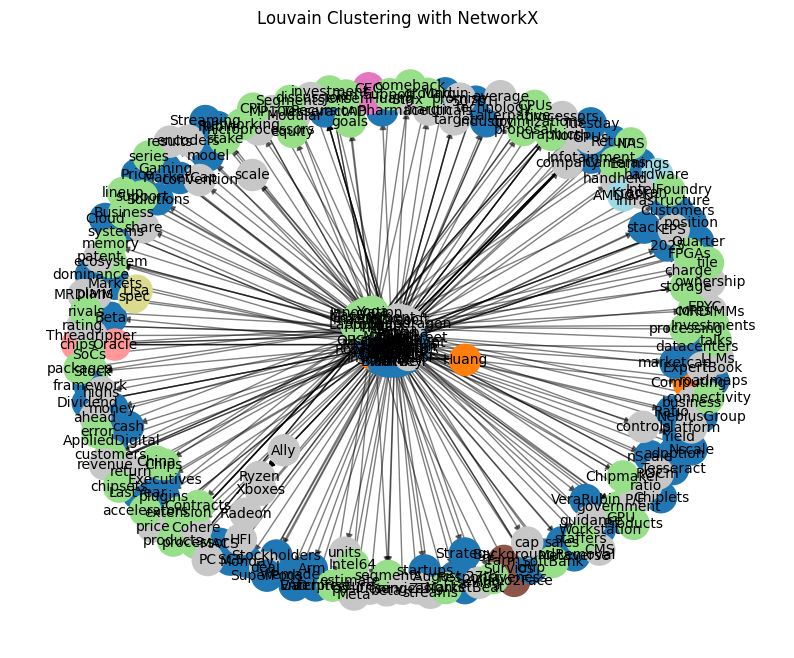

In [10]:
import matplotlib.pyplot as plt

communities = nx.community.louvain_communities(G, seed=123)

community_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_map[node] = i

pos = nx.spring_layout(G, seed=42)
node_colors = [community_map[n] for n in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.tab20, node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.title("Louvain Clustering with NetworkX")
plt.axis("off")
plt.show()